In [1]:
import jaydebeapi

In [2]:
import numpy
import pandas

In [3]:
stock_ID="NQF"
data_table="stockInfo"

In [4]:
field_names=[
    'StockID', 'StockDate', 
    'StockOpen', 'StockHigh', 'StockLow', 'StockClose', 
    'StockAdjClose', 'StockVol'
    ]

In [19]:
dbConnection = jaydebeapi.connect(
    "org.h2.Driver",
    "jdbc:h2:C:/Users/user/anaconda3/Projects/data/H2",
    ["SA", ""],
    "C:/Java/h2/bin/h2-1.4.200.jar")

dbCursor = dbConnection.cursor()
#作業空間

In [6]:
#SQL
_sql=[
    "SELECT LEFT(StockDate,7) AS YM,",
    "MIN(StockOpen) AS MinstockOpen, AVG(StockOpen) AS AvgstockOpen,MAX(StockOpen) AS MaxstockOpen,",
    "(MAX(StockOpen)+MIN(StockOpen))*0.5 AS ScalestockOpen",
    "FROM STOCKINFO",
    "WHERE StockID= '%s'" % stock_ID,
    "GROUP BY LEFT(StockDate,7)",
    "HAVING AVG(StockOpen)>(MAX(StockOpen)+MIN(StockOpen))*0.5" #having針對答案進行第二次篩選
]

dbCursor.execute(' '.join(_sql))
resultSet = dbCursor.fetchall()

rows={
    'YM':[],
    'MIN_OPEN':[],
    'AVG_OPEN':[],
    'MAX_OPEN':[],
    'SCALE_OPEN':[]
}

for row in resultSet:
    rows['YM'].append(row[0]),
    rows['MIN_OPEN'].append(row[1])
    rows['AVG_OPEN'].append(row[2])
    rows['MAX_OPEN'].append(row[3])
    rows['SCALE_OPEN'].append(row[4])

results=pandas.DataFrame(data=rows).set_index(['YM'])
results.head()

,MIN_OPEN,AVG_OPEN,MAX_OPEN,SCALE_OPEN
YM,,,,
2017-01,4876.75,5040.500000,5148.25,5012.500
2017-02,5129.50,5247.973684,5352.50,5241.000
2017-06,5648.25,5775.897727,5880.25,5764.250
2017-07,5591.25,5816.144737,5961.00,5776.125
2017-08,5769.00,5871.782609,5936.25,5852.625


In [7]:
#python
_sql=[
    "SELECT STOCKDATE ,LEFT(StockDate,7) AS YM, StockOpen",
    "FROM STOCKINFO",
    "WHERE StockID= '%s'" % stock_ID
]

dbCursor.execute(' '.join(_sql))
resultSet = dbCursor.fetchall()

rows={
    'STOCKDATE':[],
    'YM':[],
    'STOCKOPEN':[]
}
for row in resultSet:
    rows['STOCKDATE'].append(row[0])
    rows['YM'].append(row[1])
    rows['STOCKOPEN'].append(row[2])
    
results=pandas.DataFrame(data=rows).set_index(['STOCKDATE']).groupby(by=['YM']).agg(['min','mean','max'])
results.columns=[['MIN_OPEN','AVG_OPEN','MAX_OPEN']]
results['SCALE_OPEN']=0.5* numpy.add(results['MAX_OPEN'].values,results['MIN_OPEN'].values) #用numpy將兩值做相加
results.head()

,MIN_OPEN,AVG_OPEN,MAX_OPEN,SCALE_OPEN
YM,,,,
2017-01,4876.75,5040.500000,5148.25,5012.500
2017-02,5129.50,5247.973684,5352.50,5241.000
2017-03,5334.25,5381.304348,5440.75,5387.500
2017-04,5352.75,5442.052632,5584.50,5468.625
2017-05,5575.50,5676.806818,5793.00,5684.250


In [8]:
#python
condition=[]

for i in range(results.shape[0]):
    row = results.iloc[i] #序號(第幾筆)
    condition.append(row['SCALE_OPEN'] > row['AVG_OPEN'])
    
results[condition] #將產生的真值表放入[]內做條件篩選(印出為true的結果)

,MIN_OPEN,AVG_OPEN,MAX_OPEN,SCALE_OPEN
YM,,,,
2017-03,5334.25,5381.304348,5440.75,5387.500
2017-04,5352.75,5442.052632,5584.50,5468.625
2017-05,5575.50,5676.806818,5793.00,5684.250
2017-10,5984.00,6080.909091,6221.75,6102.875
2017-11,6230.00,6319.250000,6423.50,6326.750
2018-04,6405.75,6627.690476,6855.25,6630.500
2018-08,7284.25,7446.445652,7672.75,7478.500
2018-09,7433.00,7541.289474,7670.00,7551.500
2019-03,7022.25,7259.190476,7526.75,7274.500


In [9]:
_year=2018
_sql=[
    "SELECT LEFT(StockDate,7) AS YM,",
    "MIN(StockOpen) AS MinstockOpen, AVG(StockOpen) AS AvgstockOpen,MAX(StockOpen) AS MaxstockOpen,",
    "(MAX(StockOpen)+MIN(StockOpen))*0.5 AS ScalestockOpen",
    "FROM STOCKINFO",
    "WHERE LEFT(STOCKDATE,4)='%s' AND StockID= '%s'" % (_year,stock_ID),
    "GROUP BY LEFT(StockDate,7)",
    "HAVING AVG(StockOpen)>(MAX(StockOpen)+MIN(StockOpen))*0.5" 
]

dbCursor.execute(' '.join(_sql))
resultSet = dbCursor.fetchall()

rows={
    'YM':[],
    'MIN_OPEN':[],
    'AVG_OPEN':[],
    'MAX_OPEN':[],
    'SCALE_OPEN':[]
}

for row in resultSet:
    rows['YM'].append(row[0]),
    rows['MIN_OPEN'].append(row[1])
    rows['AVG_OPEN'].append(row[2])
    rows['MAX_OPEN'].append(row[3])
    rows['SCALE_OPEN'].append(row[4])

results=pandas.DataFrame(data=rows).set_index(['YM'])
results.head()

,MIN_OPEN,AVG_OPEN,MAX_OPEN,SCALE_OPEN
YM,,,,
2018-01,6405.00,6774.940476,7030.00,6717.500
2018-02,6328.00,6713.597222,7003.50,6665.750
2018-03,6490.75,6868.773810,7136.75,6813.750
2018-05,6606.00,6868.863636,6989.50,6797.750
2018-06,6982.50,7169.369048,7315.25,7148.875


<h3> 設計函式</h3>

In [10]:
def Calc_Open(year,stock_id):
    _sql=[
    "SELECT STOCKDATE ,LEFT(StockDate,7) AS YM, StockOpen",
    "FROM STOCKINFO",
    "WHERE LEFT(STOCKDATE,4)='%s' AND StockID= '%s'" % (year,stock_id),
    ]

    dbCursor.execute(' '.join(_sql))
    resultSet = dbCursor.fetchall()

    rows={
        'STOCKDATE':[],
        'YM':[],
        'STOCKOPEN':[]
    }

    for row in resultSet:
        rows['STOCKDATE'].append(row[0])
        rows['YM'].append(row[1])
        rows['STOCKOPEN'].append(row[2])

    results=pandas.DataFrame(data=rows).set_index(['STOCKDATE']).groupby(by=['YM']).agg(['min','mean','max'])
    results.columns=[['MIN_OPEN','AVG_OPEN','MAX_OPEN']]                                                                                   
    return results

In [11]:
df_2019=Calc_Open(year=2019,stock_id=stock_ID)
df_2019.tail()

,MIN_OPEN,AVG_OPEN,MAX_OPEN
YM,,,
2019-08,7349.00,7623.875000,7834.00
2019-09,7614.25,7816.912500,7916.25
2019-10,7551.50,7856.641304,8128.50
2019-11,8094.25,8266.381579,8402.75
2019-12,8258.75,8502.434211,8801.00


In [21]:
df_all= None
for _year in [2017,2018,2019]:
    _df=Calc_Open(year=_year,stock_id=stock_ID)
    if df_all is None:
        df_all=_df
    else:
        df_all=pandas.concat([df_all,_df]) #將兩資料表合併
df_all

,MIN_OPEN,AVG_OPEN,MAX_OPEN
YM,,,
2017-01,4876.75,5040.500000,5148.25
2017-02,5129.50,5247.973684,5352.50
2017-03,5334.25,5381.304348,5440.75
2017-04,5352.75,5442.052632,5584.50
2017-05,5575.50,5676.806818,5793.00
2017-06,5648.25,5775.897727,5880.25
2017-07,5591.25,5816.144737,5961.00
2017-08,5769.00,5871.782609,5936.25
2017-09,5878.75,5958.600000,6001.75


In [13]:
dbCursor.close()
dbConnection.close()

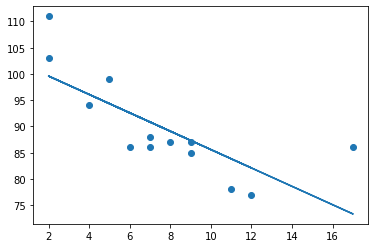

In [12]:
import matplotlib.pyplot as plt
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [4]:
def myfunc(x):
  return slope * x + intercept

In [13]:
mymodel 

[94.3495217071376,
 90.84694628403237,
 89.09565857247976,
 90.84694628403237,
 99.60338484179543,
 73.33406916850626,
 99.60338484179543,
 87.34437086092716,
 96.1008094186902,
 83.84179543782193,
 82.09050772626932,
 87.34437086092716,
 92.59823399558499]